## Jeffrey Elkner

The age-adjusted all death rates and the death rate due to diabetes can be found from Heron et al. (2009) (listed below). A simplified data table (based on Table 29 on Page 101) as an Excel file is attached. Use the all death rate and the diabetes related death rate for the following questions: 

Heron, Melonie and co-authors, 2009, “Deaths: Final Data for 2006,” National Vital Statistics Reports, Vol. 57, No. 14, April 17, 2009. Available at http://www.cdc.gov/nchs/data/nvsr/nvsr57/nvsr57_14.pdf  (last accessed on October 15, 2015).

> (a). Show the histograms for both the all death rate data and diabetes death data.(Suggested values ranges and intervals for all: 620-970 and 30; and for diabetes: 12-36 and 2. (4 points)

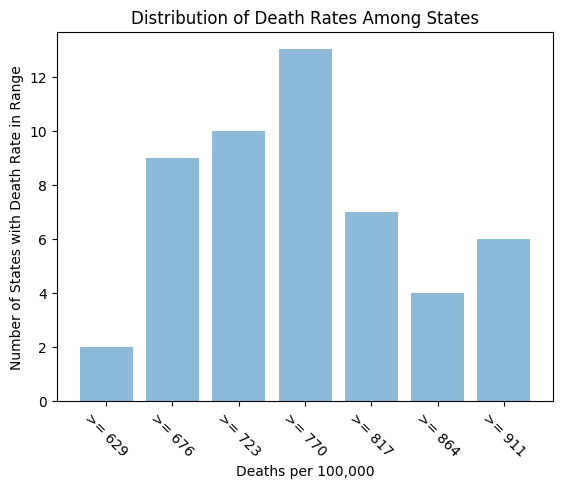

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

file = 'Data/GGS560_HW7_Data.xlsx'
xl = pd.ExcelFile(file)
xl.sheet_names
data = xl.parse(xl.sheet_names[0]).iloc[:,0:3].set_index('State')
#print(data)
all_deaths = data['All (y)'].tolist()
diabetes = data['Diabetes (x) '].tolist()

def make_histogram_data(data, num_buckets):
    low = int(min(data))
    bucket_size = int((max(data) - min(data)) / num_buckets)
    
    buckets = [low + i * bucket_size for i in range(num_buckets)]
    labels = ['>= {}'.format(i) for i in buckets]
    counts = [0] * len(buckets)
    
    for val in data:
        pos = 0
        while pos < len(buckets) - 1 and val > buckets[pos + 1]:
            pos += 1
        counts[pos] += 1
    
    return {'buckets': buckets, 'labels': labels, 'counts': counts}
        
all_death_data = make_histogram_data(all_deaths, 7)
 
objects = tuple(all_death_data['labels'])
y_pos = np.arange(len(objects))
performance = all_death_data['counts']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xlabel('Deaths per 100,000')
plt.xticks(y_pos, objects, rotation="-45")
plt.ylabel('Number of States with Death Rate in Range')
plt.title('Distribution of Death Rates Among States') 
plt.show()

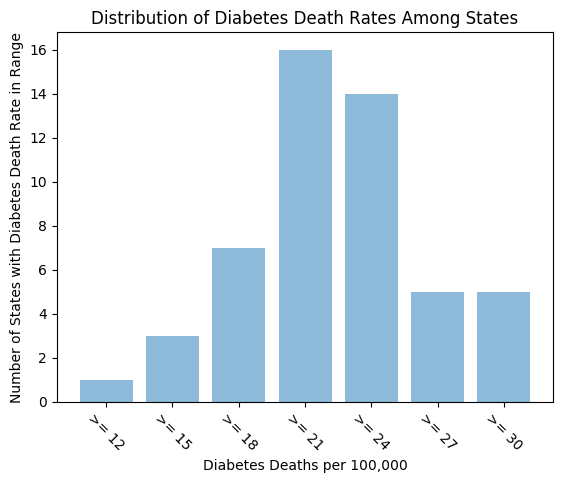

In [2]:
diabetes_data = make_histogram_data(diabetes, 7)

objects = tuple(diabetes_data['labels'])
y_pos = np.arange(len(objects))
performance = diabetes_data['counts']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xlabel('Diabetes Deaths per 100,000')
plt.xticks(y_pos, objects, rotation="-45")
plt.ylabel('Number of States with Diabetes Death Rate in Range')
plt.title('Distribution of Diabetes Death Rates Among States') 
plt.show()

> (b). Create a scatter plot with the two death rates. (2 points)

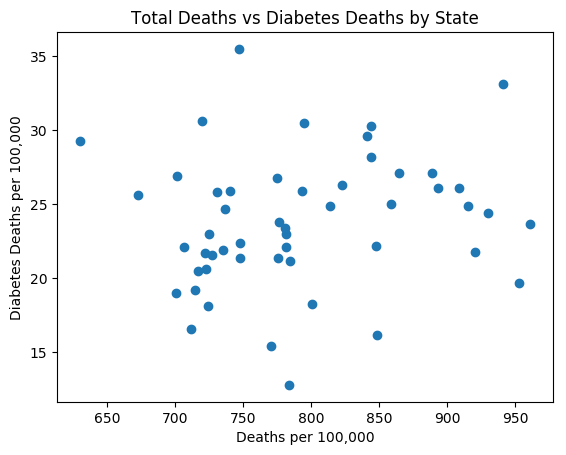

In [3]:
plt.plot(all_deaths, diabetes, 'o')
plt.xlabel('Deaths per 100,000')
plt.ylabel('Diabetes Deaths per 100,000')
plt.title('Total Deaths vs Diabetes Deaths by State')
plt.show()

> (c). Compute the Pearson’s correlation coefficient. (8 points)

In [4]:
# SOLUTION:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# http://onlinestatbook.com/2/describing_bivariate_data/pearson.html
# https://www.wikihow.com/Calculate-Pearson-Correlation-Coefficient
from ggs560.ggs560_tools import mean
from ggs560.ggs560_tools import standard_deviation as sd

def pearson_coefficient(ds1, ds2):
    m1 = mean(ds1)
    m2 = mean(ds2)
    numerator = sum([(ds1[i] - m1) * (ds2[i] - m2) for i in range(len(ds1))])
    denominator = (len(ds1) - 1) * sd(ds1) * sd(ds2)
    return numerator / denominator

result = "The Pearson's coefficient between all deaths and deaths from"
result += " diabetes is {:0.2f}"
print(result.format(pearson_coefficient(all_deaths, diabetes)))

The Pearson's coefficient between all deaths and deaths from diabetes is 0.16


> (d). Calculate the t value for Pearson’s r and estimate the p value against the null hypothesis: no correlation between the two variables. Draw your conclusion on the significance of the correlation. (5 points)

> (e). Calculate Spearman’s correlation coefficient. (8 points)

In [5]:
# SOLUTION:
# First, find a few good resources:
# 1. https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
# 2. https://www.wikihow.com/Calculate-Spearman%27s-Rank-Correlation-Coefficient
# Then use this opportunity to explore pandas dataframes.
# Open the previously pickled dataframe from excel spreadsheet.
from collections import Counter

data = pd.read_pickle('Data/deathrates.dat')

def find_rank(val, data):
    rank = 1

    for item in data:
        if val > item:
            rank += 1

    return rank

# Add columns to dataframe with values described in resource 2
for i in range(len(data)):
    r1 = find_rank(data['All_Deaths'][i], data['All_Deaths'])
    r2 = find_rank(data['Diabetes'][i], data['Diabetes'])
    d = abs(r1 - r2)
    d2 = d ** 2
    data.set_value(i, 'ADRank', r1)
    data.set_value(i, 'DRank', r2)
    data.set_value(i, 'd', d)
    data.set_value(i, 'd**2', d2)

# Check to see if their are duplicate ranks
ctr1 = Counter(data['ADRank'])
ctr2 = Counter(data['DRank'])

for key in ctr1:
    if ctr1[key] > 1:
        print(key, ctr1[key])


Counter({20: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1})
Counter({13: 2, 19: 2, 23: 2, 30: 2, 35: 2, 37: 2, 42: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 15: 1, 16: 1, 17: 1, 18: 1, 21: 1, 22: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 32: 1, 33: 1, 34: 1, 39: 1, 40: 1, 41: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1})


> (f). Calculate the t value for Spearman’s rank correlation coefficient and state if the correlation is significant at 5% level. (5 points)

> (g). A 3X2 frequency matrix was also created by separating the all death rate data into three nominal outcomes, low [≤(mean-std)], medium [(mean-std)<value≤mean+std)], and high [>(mean+std)] and into binary values (low and high against the mean) for the diabetes death rate data. Using the given contingency table, compute the χ2 statistic and estimate the p-value against the null hypothesis that the two death rates are independent from each other. (8 points)